# Exploratory Data Analysis


The objective of this notebook is to explore datasets.
You will need Pandas, a tutorial is available [here](https://pandas.pydata.org/docs/user_guide/10min.html).


Please note that this notebook is inspired from notebooks published by Galiana, Lino. 2023. Python Pour La Data Science. https://doi.org/10.5281/zenodo.8229676.

## Dataset
We consider a dataset gathering information about elections and votes between 2000 and 2016 in the USA. Il also maps economics signals.

In [1]:
import requests

url = 'https://raw.githubusercontent.com/linogaliana/python-datascientist/master/content/modelisation/get_data.py'
r = requests.get(url, allow_redirects=True)
open('getdata.py', 'wb').write(r.content)

import getdata
votes = getdata.create_votes_dataframes()
votes.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.17940 40.35068, -98.72683 40.350...",...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican


Q1. What is the size of the dataframe? (number of lines and columns)

Print the column names and their types.

Print the statistics of each numerical column (mean, std, quartile, min, max).

In [2]:
print("rows:", len(votes))
print("columns: ",votes.columns.size) #votes.columns.inferred_type

print("data frame column type: ", votes.dtypes)

rows: 3107
columns:  383
data frame column type:  STATEFP                   object
COUNTYFP                  object
COUNTYNS                  object
AFFGEOID                  object
GEOID                     object
                          ...   
share_2012_republican    float64
share_2016_democrat      float64
share_2016_other         float64
share_2016_republican    float64
winner                    object
Length: 383, dtype: object


In [3]:
display(votes.describe())

,ALAND,AWATER,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS_y,...,share_2004_republican,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican
count,3.107000e+03,3.107000e+03,3.107000e+03,3.107000e+03,3.107000e+03,3.107000e+03,3107.000000,3107.000000,3107.000000,3107.000000,...,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000,3107.000000
mean,2.462040e+09,1.373998e+08,2.375962e+04,2.598733e+04,5.068057e+04,-2.227707e+03,0.650324,0.332148,0.318176,30666.868040,...,0.602478,0.414978,0.016538,0.568484,0.383916,0.019784,0.596300,0.314797,0.051851,0.633004
std,3.376328e+09,5.432790e+08,5.434766e+04,9.751939e+04,1.502634e+05,5.623596e+04,0.160682,0.159230,0.319820,14983.619833,...,0.125568,0.138194,0.013338,0.137712,0.146793,0.013975,0.148073,0.151971,0.030405,0.156482
min,5.300262e+06,0.000000e+00,6.000000e+01,4.000000e+00,6.600000e+01,-1.883355e+06,0.053973,0.030909,-0.867524,1001.000000,...,0.093398,0.049080,0.000000,0.065326,0.034483,0.000000,0.071934,0.031447,0.003344,0.040875
25%,1.114608e+09,7.075804e+06,3.674000e+03,1.296500e+03,5.353000e+03,8.595000e+02,0.558025,0.208777,0.136004,19044.000000,...,0.522288,0.313901,0.010007,0.478554,0.277425,0.012204,0.503178,0.203321,0.031734,0.544812
50%,1.580933e+09,1.900978e+07,8.291000e+03,3.667000e+03,1.254000e+04,3.039000e+03,0.683165,0.299395,0.384808,29211.000000,...,0.607826,0.410865,0.015311,0.572294,0.371034,0.017327,0.607998,0.282595,0.047449,0.663534
75%,2.368309e+09,5.633591e+07,2.071450e+04,1.212150e+04,3.361100e+04,7.383000e+03,0.774953,0.422347,0.566318,46006.000000,...,0.689305,0.504031,0.020431,0.668634,0.473844,0.024333,0.702955,0.398458,0.065851,0.749155
max,5.197558e+10,1.405367e+10,1.145530e+06,3.028885e+06,4.263443e+06,1.190050e+05,0.961818,0.921497,0.930909,56045.000000,...,0.919736,0.924571,0.347630,0.926380,0.909131,0.121634,0.958621,0.908638,0.356501,0.960334


Q2. What are the different values of the 'winner' variable? Recode this values into numbers 1,2,3,... and store this encoding in a new variable "winner2".

In [4]:
winner_values = set(votes["winner"])
print(winner_values)

l = [1 if x=="democrats" else 2 for x in votes["winner"] ]

print(l)

votes.insert(votes.columns.size,"winner2",l)
votes.head(3)


{'republican', 'democrats'}
[2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner,winner2
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican,2
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.17940 40.35068, -98.72683 40.350...",...,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican,2
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican,2


In [5]:
votes.head(5)



,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner,winner2
0,29,227,00758566,0500000US29227,29227,Worth,06,690564983,493903,"POLYGON ((-94.63203 40.57176, -94.53388 40.570...",...,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,republican,2
1,31,061,00835852,0500000US31061,31061,Franklin,06,1491355860,487899,"POLYGON ((-99.17940 40.35068, -98.72683 40.350...",...,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,republican,2
2,36,013,00974105,0500000US36013,36013,Chautauqua,06,2746047476,1139407865,"POLYGON ((-79.76195 42.26986, -79.62748 42.324...",...,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,republican,2
3,37,181,01008591,0500000US37181,37181,Vance,06,653713542,42178610,"POLYGON ((-78.49773 36.51467, -78.45728 36.541...",...,0.004743,0.364429,0.638870,0.004891,0.356239,0.612154,0.020824,0.367022,democrats,1
4,47,183,01639799,0500000US47183,47183,Weakley,06,1503107848,3707114,"POLYGON ((-88.94916 36.41010, -88.81642 36.410...",...,0.017458,0.646822,0.287590,0.014914,0.697495,0.227511,0.033158,0.739330,republican,2


## Descriptive analysis


Q3. Create a dataframe including only those variables: "winner", "votes_gop",
          'Unemployment_rate_2019', 'Median_Household_Income_2019',
          'Percent of adults with less than a high school diploma, 2015-19',
          "Percent of adults with a bachelor's degree or higher, 2015-19".
Keep the index "GEOID" as index of your dataframe. (use *set_index*).


In [6]:
new_df = votes[["GEOID","winner", "votes_gop",
          'Unemployment_rate_2019', 'Median_Household_Income_2019',
          'Percent of adults with less than a high school diploma, 2015-19',
          "Percent of adults with a bachelor's degree or higher, 2015-19"]]
display(new_df.head(3))

,GEOID,winner,votes_gop,Unemployment_rate_2019,Median_Household_Income_2019,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,29227,republican,877,2.7,45023.0,10.169492,20.000000
1,31061,republican,1437,3.4,49659.0,7.534552,17.298262
2,36013,republican,34853,4.7,50143.0,11.192287,22.248287


In [7]:
new_df.set_index("GEOID",inplace=True)
display(new_df.head(3))

,winner,votes_gop,Unemployment_rate_2019,Median_Household_Income_2019,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
GEOID,,,,,,
29227,republican,877,2.7,45023.0,10.169492,20.000000
31061,republican,1437,3.4,49659.0,7.534552,17.298262
36013,republican,34853,4.7,50143.0,11.192287,22.248287


Q4. Create a frequency tab for each winner value. Build the plot with horizontal bars illustrating this frequency.

In [8]:
nb_demo=l =sum( [1 if x=="democrats"  else 0 for x in votes["winner"] ])
nb_repu=l =sum( [1 if x=="republican" else 0 for x in votes["winner"] ])


print("frequ democrats:", nb_demo)
print("frequ republican:", nb_repu)

frequ democrats: 533
frequ republican: 2574


Q5. Let's consider the 'Median_Household_Income_2019' variable. Transform this variable into a categorical one with 5 five labels. Create the frequency tabl and the associated graph.

In [9]:
import numpy as np
nb_total = new_df['Median_Household_Income_2019']

max = nb_total.max()
min = nb_total.min()

diff = max - min

step = diff / 5

bins = [min + step * i for i in range(0, 5) ]
classement = np.digitize(new_df['Median_Household_Income_2019'],bins,right=False)
print(bins)



[24732.0, 50146.8, 75561.6, 100976.4, 126391.2]


In [10]:
new_df.insert(new_df.columns.size,"Labels",classement)

In [11]:
print(sum([1 for x in new_df['Labels'] if x==3]))

196


In [12]:
display(new_df.head(3))

,winner,votes_gop,Unemployment_rate_2019,Median_Household_Income_2019,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",Labels
GEOID,,,,,,,
29227,republican,877,2.7,45023.0,10.169492,20.000000,1
31061,republican,1437,3.4,49659.0,7.534552,17.298262,1
36013,republican,34853,4.7,50143.0,11.192287,22.248287,1


In [103]:
# df_freq = new_df["Labels"]
# ax = df_freq.plot.hist(bins=10,align='mid')


<Axes: xlabel='Labels', ylabel='Count'>

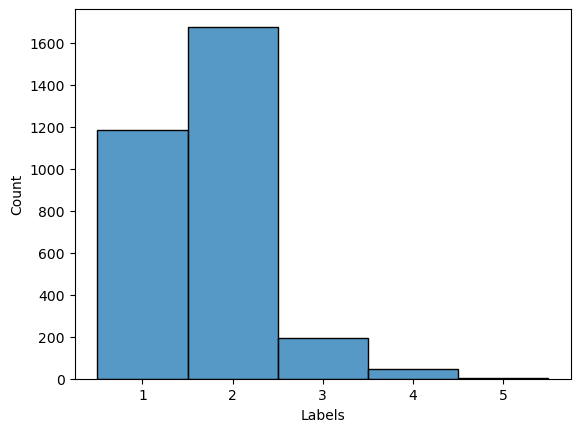

In [13]:
import seaborn as sns
import numpy as np
import pandas as pd

sns.histplot(data = new_df['Labels'], bins = 5, discrete= True )

<Axes: xlabel='Median_Household_Income_2019', ylabel='Density'>

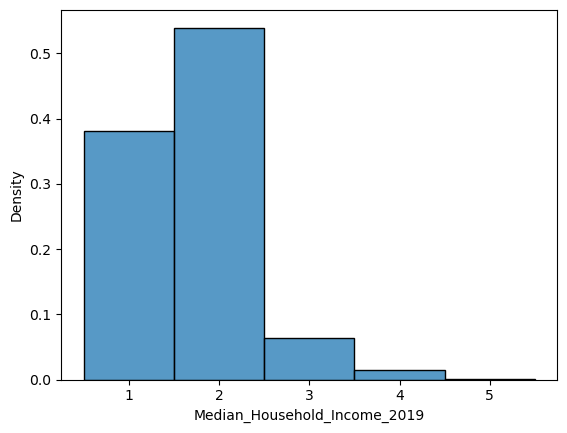

In [14]:
data = pd.cut(new_df['Median_Household_Income_2019'],bins = 5, labels=range(1,6))
sns.histplot(data = data, bins = 5, discrete= True, stat ="density" )

Q6. Provide descriptive statistics of all variables in the dataframe.

In [15]:
new_df.describe

<bound method NDFrame.describe of            winner  votes_gop  Unemployment_rate_2019  \
GEOID                                                  
29227  republican        877                     2.7   
31061  republican       1437                     3.4   
36013  republican      34853                     4.7   
37181   democrats       8391                     5.8   
47183  republican      10396                     4.0   
...           ...        ...                     ...   
40091  republican       6172                     5.8   
40095  republican       4891                     3.5   
48225  republican       7060                     3.1   
48407  republican      10161                     4.6   
48395  republican       5646                     3.6   

       Median_Household_Income_2019  \
GEOID                                 
29227                       45023.0   
31061                       49659.0   
36013                       50143.0   
37181                       40450.0   
471

Q7. Build an histogram for the variables vote_gop.

<Axes: xlabel='votes_gop', ylabel='Density'>

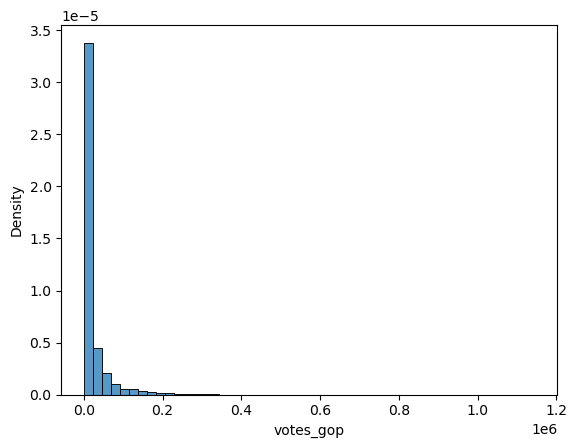

In [16]:
sns.histplot(data = new_df["votes_gop"],bins=50, stat ="density" )

Q8. Extract the correlation matrix. Graph it by using the seaborn package and its heatmap function.
Plot a matrix of point clouds of df2 variables with pd.plotting.scatter_matrix.
Interpret

In [17]:
import matplotlib.pyplot as plt

corr = new_df[[ "votes_gop",
          'Unemployment_rate_2019', 'Median_Household_Income_2019',
          'Percent of adults with less than a high school diploma, 2015-19',
          "Percent of adults with a bachelor's degree or higher, 2015-19"]].corr()
corr



,votes_gop,Unemployment_rate_2019,Median_Household_Income_2019,"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
votes_gop,1.000000,-0.079032,0.348820,-0.112228,0.374353
Unemployment_rate_2019,-0.079032,1.000000,-0.433553,0.356210,-0.356081
Median_Household_Income_2019,0.348820,-0.433553,1.000000,-0.514726,0.714189
"Percent of adults with less than a high school diploma, 2015-19",-0.112228,0.356210,-0.514726,1.000000,-0.593546
"Percent of adults with a bachelor's degree or higher, 2015-19",0.374353,-0.356081,0.714189,-0.593546,1.000000


<Axes: >

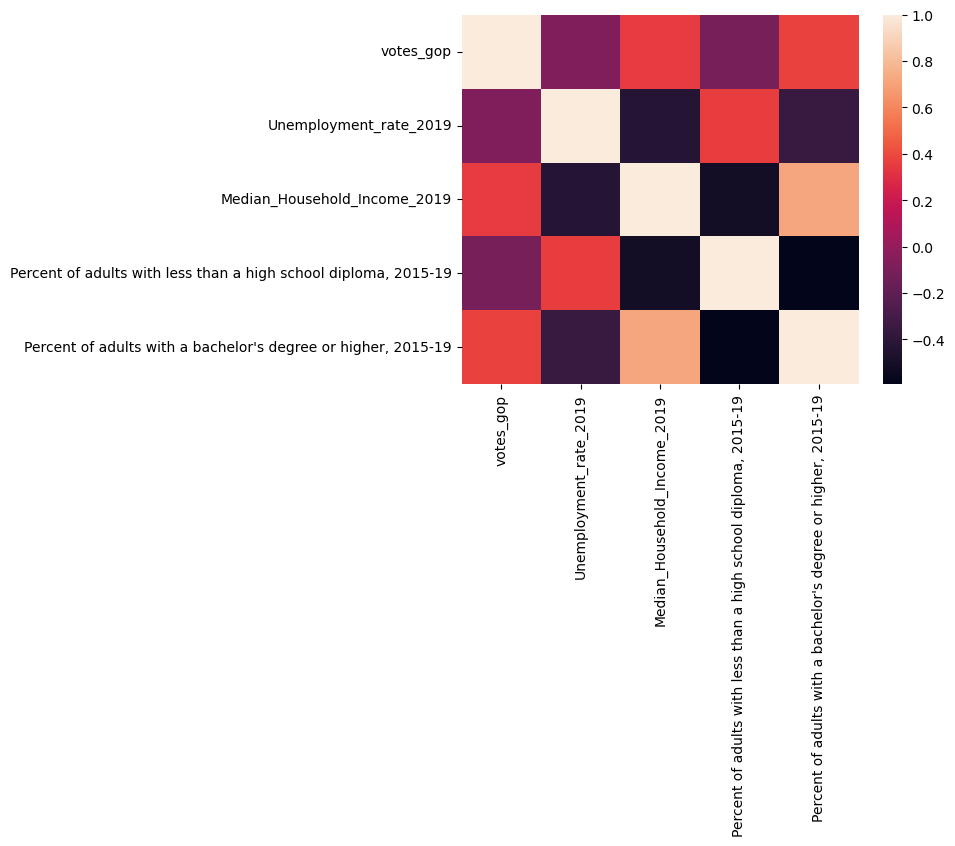

In [18]:
sns.heatmap(corr)

array([[<Axes: xlabel='votes_gop', ylabel='votes_gop'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='votes_gop'>,
        <Axes: xlabel='Median_Household_Income_2019', ylabel='votes_gop'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='votes_gop'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='votes_gop'>],
       [<Axes: xlabel='votes_gop', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Unemployment_rate_2019', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Median_Household_Income_2019', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel='Percent of adults with less than a high school diploma, 2015-19', ylabel='Unemployment_rate_2019'>,
        <Axes: xlabel="Percent of adults with a bachelor's degree or higher, 2015-19", ylabel='Unemployment_rate_2019'>],
       [<Axes: xlabel='votes_gop', ylabel='Median_Household_Income_2019'>,
        <Axes: xlabel=

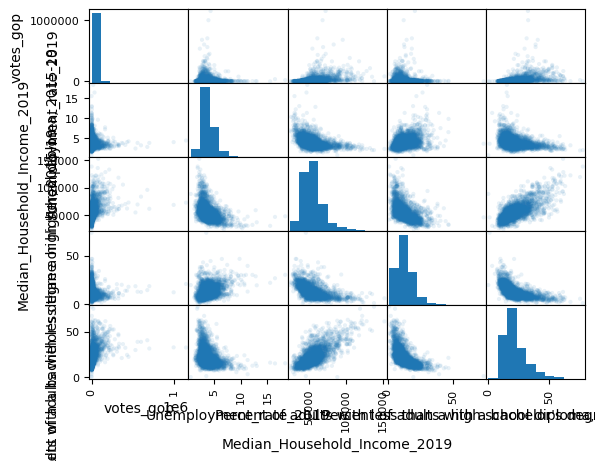

In [19]:

pd.plotting.scatter_matrix(new_df[[ "votes_gop",
          'Unemployment_rate_2019', 'Median_Household_Income_2019',
          'Percent of adults with less than a high school diploma, 2015-19',
          "Percent of adults with a bachelor's degree or higher, 2015-19"]], alpha=0.1)

## Visualization with maps


Q9. Below, we have two blocks of code generating two different graphs (the first map is a choropleth card). They use the same dataset but have different shapes. Comment these graphs and the differences.

C:\Users\yacin\AppData\Local\Temp\ipykernel_28208\1727178440.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  group.plot(ax=ax, column='winner', label=key, color=color_dict[key])
C:\Users\yacin\AppData\Local\Temp\ipykernel_28208\1727178440.py:12: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  group.plot(ax=ax, column='winner', label=key, color=color_dict[key])


(-127.6146362, -64.0610978, 23.253819649999997, 50.628669349999996)

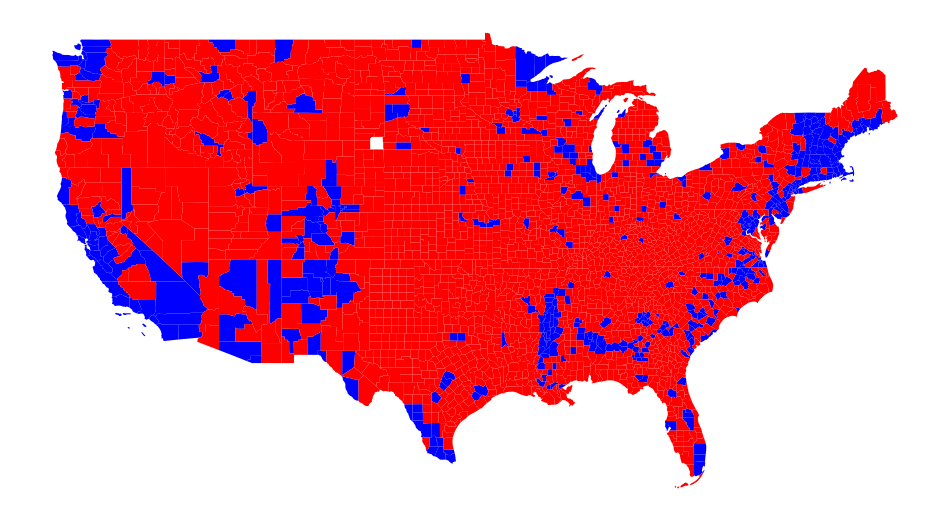

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# republican : red, democrat : blue
color_dict = {'republican': '#FF0000', 'democrats': '#0000FF'}

fig, ax = plt.subplots(figsize = (12,12))
grouped = votes.groupby('winner')
for key, group in grouped:
    group.plot(ax=ax, column='winner', label=key, color=color_dict[key])
plt.axis('off')

In [21]:
import plotly
import plotly.graph_objects as go
import pandas as pd
import geopandas as gpd
import numpy as np


centroids = votes.copy()
centroids.geometry = centroids.centroid
centroids['size'] = centroids['CENSUS_2010_POP'] / 10000  # to get reasonable plotable number

color_dict = {"republican": '#FF0000', 'democrats': '#0000FF'}
centroids["winner"] =  np.where(centroids['votes_gop'] > centroids['votes_dem'], 'republican', 'democrats')


centroids['lon'] = centroids['geometry'].x
centroids['lat'] = centroids['geometry'].y
centroids = pd.DataFrame(centroids[["county_name",'lon','lat','winner', 'CENSUS_2010_POP',"state_name"]])
groups = centroids.groupby('winner')

df = centroids.copy()

df['color'] = df['winner'].replace(color_dict)
df['size'] = df['CENSUS_2010_POP']/6000
df['text'] = df['CENSUS_2010_POP'].astype(int).apply(lambda x: '<br>Population: {:,} people'.format(x))
df['hover'] = df['county_name'].astype(str) +  df['state_name'].apply(lambda x: ' ({}) '.format(x)) + df['text']

fig_plotly = go.Figure(
  data=go.Scattergeo(
  locationmode = 'USA-states',
  lon=df["lon"], lat=df["lat"],
  text = df["hover"],
  mode = 'markers',
  marker_color = df["color"],
  marker_size = df['size'],
  hoverinfo="text"
  )
)

fig_plotly.update_traces(
  marker = {'opacity': 0.5, 'line_color': 'rgb(40,40,40)', 'line_width': 0.5, 'sizemode': 'area'}
)

fig_plotly.update_layout(
  title_text = "Reproduction of the \"Acres don't vote, people do\" map <br>(Click legend to toggle traces)",
  showlegend = True,
  geo = {"scope": 'usa', "landcolor": 'rgb(217, 217, 217)'}
)

C:\Users\yacin\AppData\Local\Temp\ipykernel_28208\1538029200.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids.geometry = centroids.centroid


## Normalization

Q10. Standardize all variables in the dataframe (do not overwrite the values!) and look at the histogram of variable 'the Median_Household_Income_2019 variable' before/after standardization.

In [22]:

def std_column(column): 
    mean = column.mean()
    std_dev = column.std()
    return (column - mean) / std_dev

#votes.select_dtypes(include=['number'])
df_std = votes.select_dtypes(include=['number']).apply(std_column) 
df_std.head()

,ALAND,AWATER,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS_y,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner2
0,-0.524675,-0.251999,-0.421042,-0.264279,-0.329911,0.051385,0.883156,-0.866228,0.874983,-0.096096,...,-0.370957,1.314565,0.244936,-0.398754,1.520311,0.251820,-0.844721,-0.353282,0.891236,0.454977
1,-0.287497,-0.252010,-0.410738,-0.263653,-0.325778,0.060259,1.128148,-1.082874,1.105933,0.026304,...,-0.942037,0.257623,0.920381,-0.912278,0.447773,0.862132,-1.088138,-0.211254,1.100039,0.454977
2,0.084117,1.844371,0.204119,-0.029741,0.057389,0.248839,-0.389732,0.358924,-0.374506,0.356798,...,0.583593,0.117393,-0.597005,0.279994,6.874192,-0.926363,0.244877,0.446896,-0.322429,0.454977
3,-0.535590,-0.175271,-0.282784,-0.139012,-0.197530,-0.032227,-1.560427,1.631812,-1.596418,0.434750,...,1.561928,-0.884300,-1.481746,1.736831,-1.065665,-1.621241,1.956668,-1.020436,-1.699759,-2.197206
4,-0.284016,-0.246085,-0.245891,-0.235516,-0.245872,0.170775,0.663263,-0.705092,0.684280,1.102279,...,-0.573529,0.068970,0.568856,-0.656202,-0.348439,0.683416,-0.574359,-0.614774,0.679479,0.454977


Text(0, 0.5, 'Frequency')

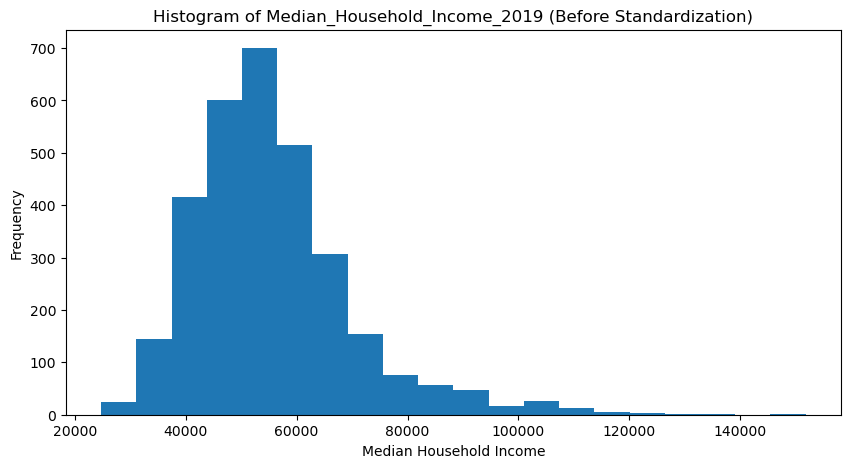

In [23]:
# before std
plt.figure(figsize=(10, 5))
plt.hist(votes['Median_Household_Income_2019'], bins=20)
plt.title('Histogram of Median_Household_Income_2019 (Before Standardization)')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

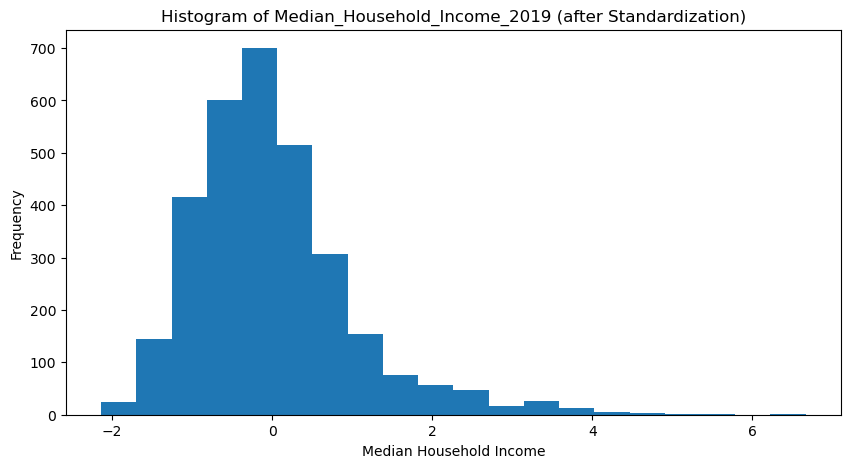

In [24]:
# after std
plt.figure(figsize=(10, 5))
plt.hist(df_std['Median_Household_Income_2019'], bins=20)
plt.title('Histogram of Median_Household_Income_2019 (after Standardization)')
plt.xlabel('Median Household Income')
plt.ylabel('Frequency')

Q11. Varify that the distribution centered at zero, and that the empirical variance is indeed equal to 1.

In [25]:
print("mean: ",df_std['Median_Household_Income_2019'].mean())
print("std: ",df_std['Median_Household_Income_2019'].std())


mean:  1.8981347624103096e-16
std:  1.000000000000001


Q12. Create scaler, a Transformer that you build on the first 1000 rows of your df2 DataFrame with the exception of the variable to be explained winner. Check the mean and standard deviation of each column on these same observations. The parameters that will be used for later standardization are stored in the .mean_ and .scale_ attributes.

In [26]:
from sklearn.preprocessing import StandardScaler

df_std_2 = votes.select_dtypes(include=['number'])
scaler = StandardScaler()
scaler.fit(df_std_2)

mean_list = scaler.mean_
std_list = scaler.scale_

df_scaled = scaler.transform(df_std_2)
df_scaled = pd.DataFrame(df_scaled, columns=df_std_2.columns)

for i, column in enumerate(df_std_2.columns):
    print(f"Column: {column}")
    print(f"Mean: {mean_list[i]}")
    print(f"Standard Deviation: {std_list[i]}")
    print()
# print()
# print("mean: ",df_scaled['Median_Household_Income_2019'].mean())
# print("std: ",df_scaled['Median_Household_Income_2019'].std())     ALAND AWATER votes_gop votes_dem

Column: ALAND
Mean: 2462039723.916318
Standard Deviation: 3375784880.2441335

Column: AWATER
Mean: 137399831.13067266
Standard Deviation: 543191532.5214372

Column: votes_gop
Mean: 23759.621177985195
Standard Deviation: 54338.91082920231

Column: votes_dem
Mean: 25987.328612809786
Standard Deviation: 97503.69735059717

Column: total_votes
Mean: 50680.5735436112
Standard Deviation: 150239.24461112308

Column: diff
Mean: -2227.7074348245897
Standard Deviation: 56226.91110822992

Column: per_gop
Mean: 0.6503236681226409
Standard Deviation: 0.16065657024300511

Column: per_dem
Mean: 0.3321478071259334
Standard Deviation: 0.15920400932100148

Column: per_point_diff
Mean: 0.31817586099670747
Standard Deviation: 0.31976827506233946

Column: FIPS_y
Mean: 30666.86803990988
Standard Deviation: 14981.208371135517

Column: Rural-urban_Continuum Code_2003
Mean: 5.109430318635339
Standard Deviation: 2.681145272373116

Column: Rural-urban_Continuum Code_2013
Mean: 4.9864821371097525
Standard Deviatio

c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1051: RuntimeWarning:

invalid value encountered in divide

c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1056: RuntimeWarning:

invalid value encountered in divide

c:\Users\yacin\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1076: RuntimeWarning:

invalid value encountered in divide



# Outlier detection

Q13. Plot the distribution of each variable in a boxplot and analyze them. Do you see outliers?


In [27]:
numerical_df = votes.select_dtypes(include=['number'])
numerical_df.head(3)

,ALAND,AWATER,votes_gop,votes_dem,total_votes,diff,per_gop,per_dem,per_point_diff,FIPS_y,...,share_2008_democrat,share_2008_other,share_2008_republican,share_2012_democrat,share_2012_other,share_2012_republican,share_2016_democrat,share_2016_other,share_2016_republican,winner2
0,690564983,493903,877,215,1107,662,0.792231,0.194219,0.598013,29227,...,0.363714,0.034072,0.602215,0.325382,0.041031,0.633588,0.186424,0.041109,0.772467,2
1,1491355860,487899,1437,276,1728,1161,0.831597,0.159722,0.671875,31061,...,0.284794,0.019974,0.695232,0.250000,0.026042,0.723958,0.149432,0.045427,0.805140,2
2,2746047476,1139407865,34853,23087,59304,11766,0.587701,0.389299,0.198401,36013,...,0.495627,0.018104,0.486269,0.425017,0.115852,0.459131,0.352012,0.065439,0.582550,2


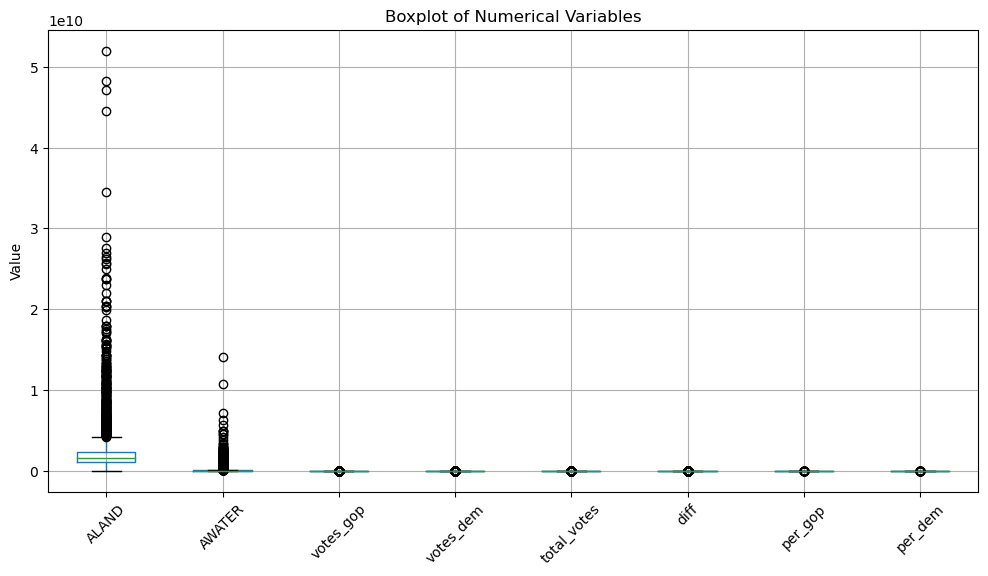

In [28]:
# Plot boxplots for each variable
plt.figure(figsize=(12, 6))
votes.iloc[:, 0:20].boxplot()
#plt.semilogy()
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.show()

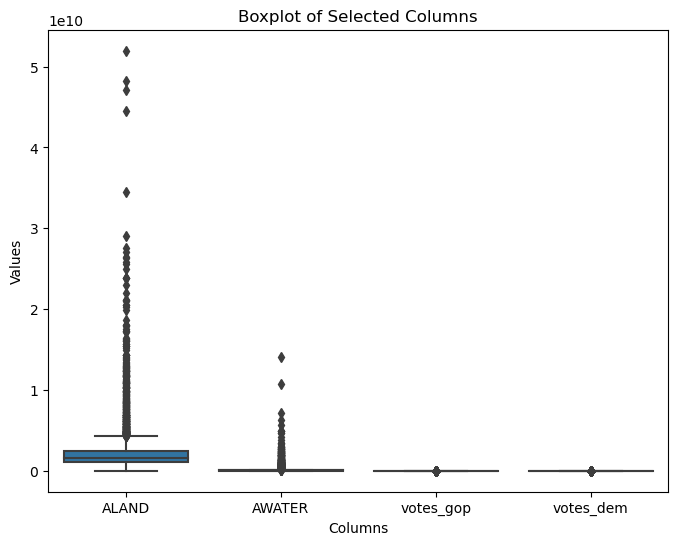

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

cols = ['ALAND', 'AWATER', 'votes_gop', 'votes_dem']

plt.figure(figsize=(8, 6))
sns.boxplot(data=votes[cols])
plt.title('Boxplot of Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()



Q14. Identify, for each variable, individuals that are not include within the window +/- 3*std. How many lines would you remove in total?

In [30]:

means = numerical_df.mean()
stds = numerical_df.std()

upper_bounds = means + 3 * stds
lower_bounds = means - 3 * stds

outliers = ((numerical_df > upper_bounds) | (numerical_df < lower_bounds)).any(axis=1)

total_outliers = outliers.sum()

print(f"Total lines to remove: {total_outliers}")


Total lines to remove: 979


Q15. Let's process over all variables with a library: you can import and use the IsolationForest function from the sklearn.ensemble package.
Change the different parameter values to identify their impact.
Do you obtain results different from the analysis of single variables.

In [35]:
from sklearn.ensemble import IsolationForest

numerical_df = numerical_df.dropna()

clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

clf.fit(numerical_df)

outlier_predictions = clf.predict(numerical_df)

num_anomalies = (outlier_predictions == -1).sum()

print(f"Total anomalies detected: {num_anomalies}") 


Error: The dataset is empty. Please check your data loading and preprocessing.


Q16. Display in a scatter plot variables 'votes_gop' and 'Unemployment_rate_2019' and color points according whether they are outliers or not. Interpret.
You can change pairs of variables.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


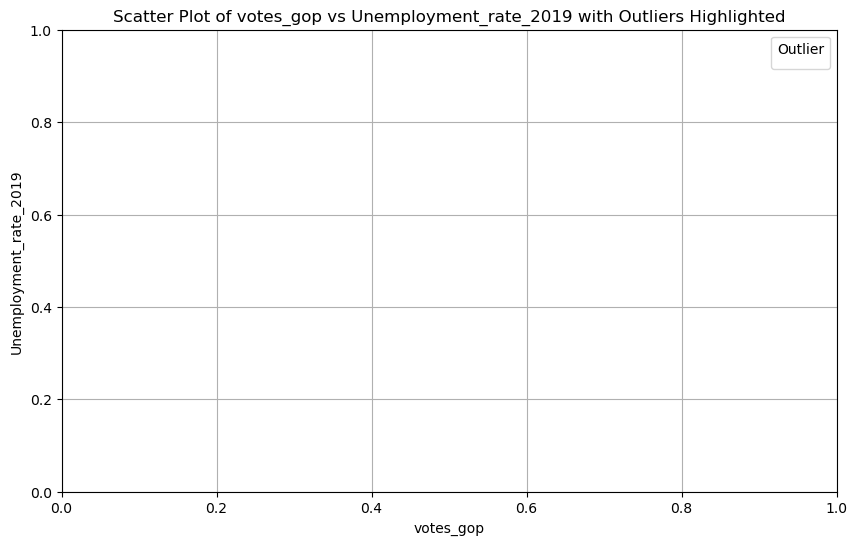

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes_gop', y='Unemployment_rate_2019', data=numerical_df, hue=outliers, palette={True: 'red', False: 'blue'}, alpha=0.7)

# Customize plot
plt.title('Scatter Plot of votes_gop vs Unemployment_rate_2019 with Outliers Highlighted')
plt.xlabel('votes_gop')
plt.ylabel('Unemployment_rate_2019')
plt.legend(title='Outlier', loc='upper right')
plt.grid(True)

# Show plot
plt.show()

Q17. Display for all pairs of variables using pairplot from seaborn.